<a href="https://colab.research.google.com/github/SallBryant/Nerual-Net-Simple-example/blob/main/%E5%85%B3%E7%B3%BB%E6%8B%9F%E5%90%88%EF%BC%88%E7%BA%BF%E6%80%A7%E5%9B%9E%E5%BD%92%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y=x.pow(2)+0.2*torch.rand(x.size())

In [ ]:
class Net(torch.nn.Module):
  def __init__(self,feature,n_hiddens,output):
    super(Net,self).__init__()
    self.hidden=torch.nn.Linear(feature,n_hiddens)
    self.predict=torch.nn.Linear(n_hiddens,output)
  def forward(self,data):
    data=F.relu(self.hidden(data))
    data=self.predict(data)
    return data

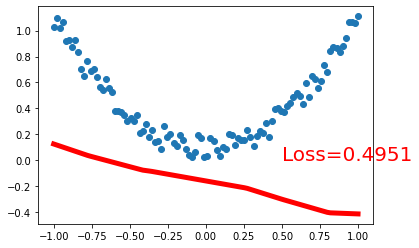

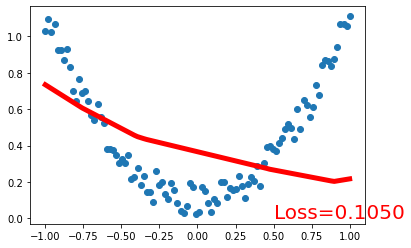

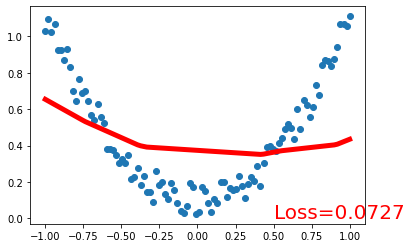

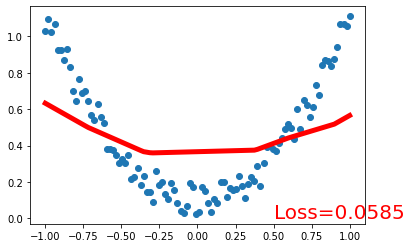

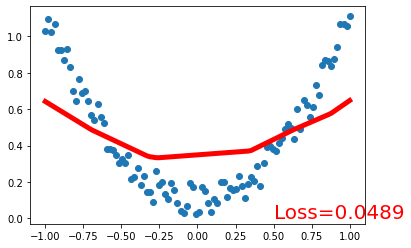

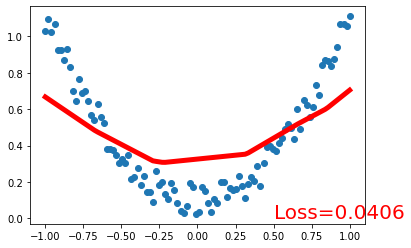

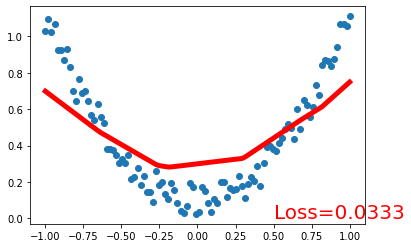

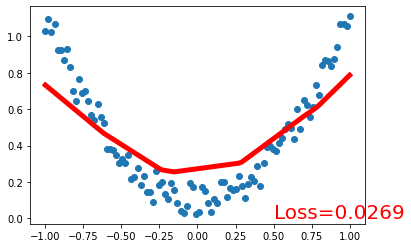

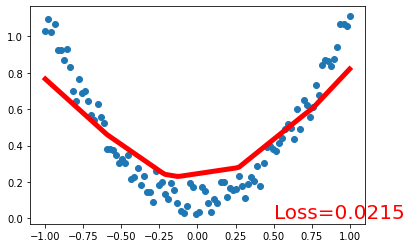

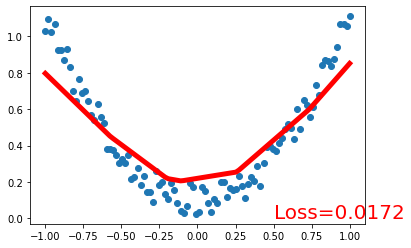

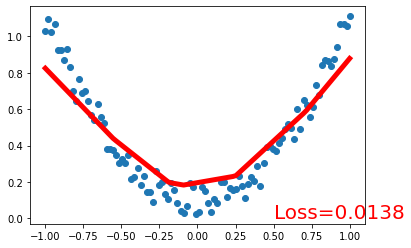

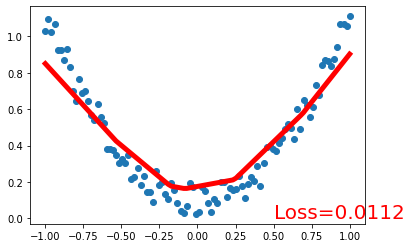

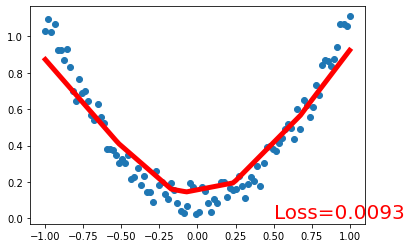

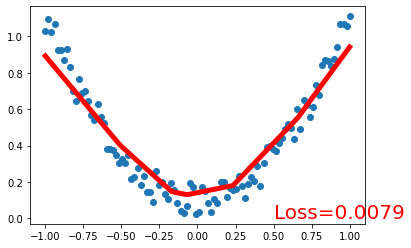

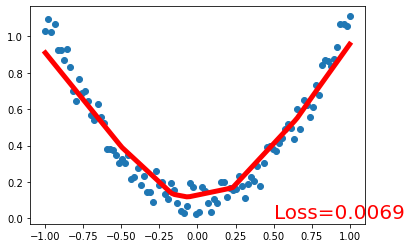

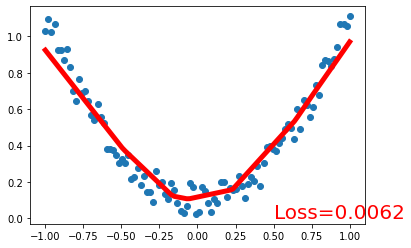

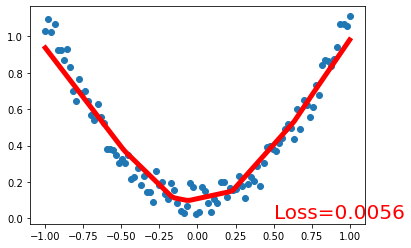

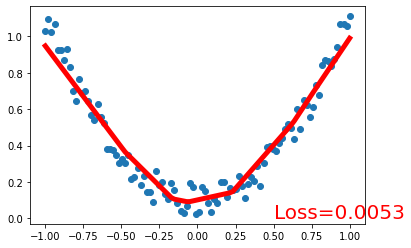

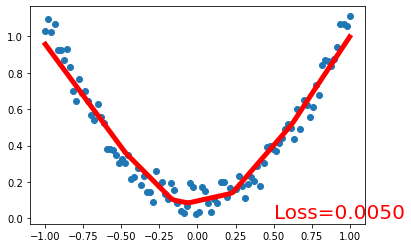

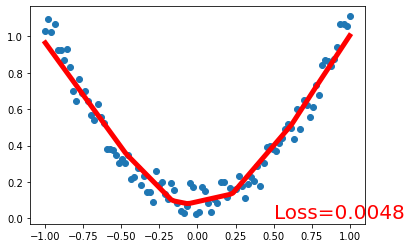

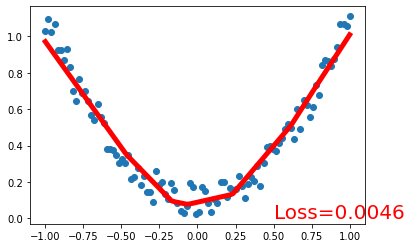

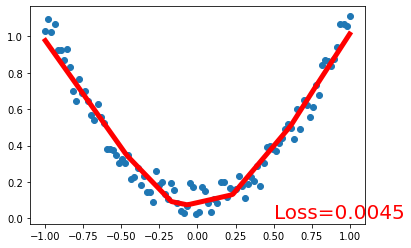

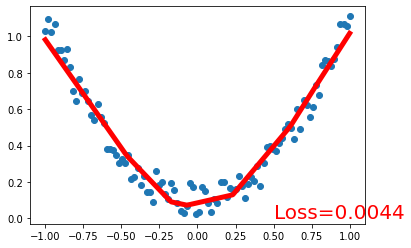

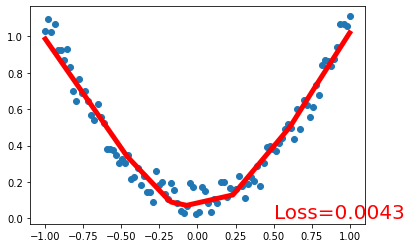

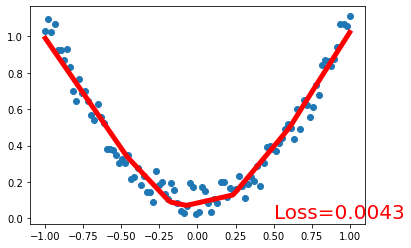

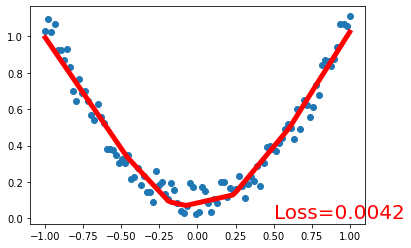

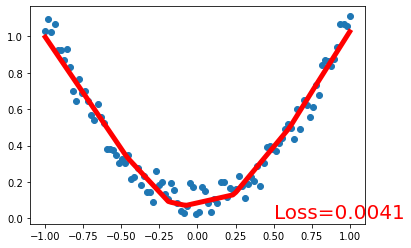

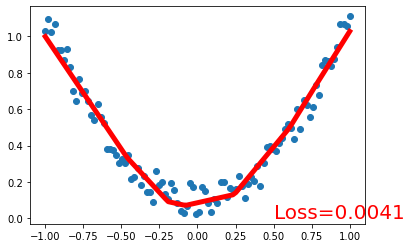

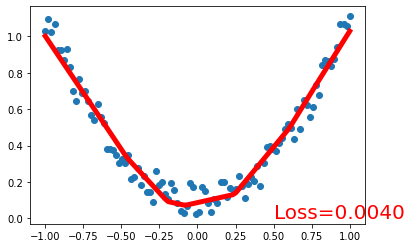

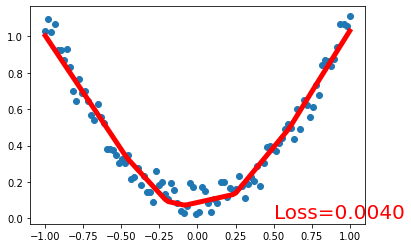

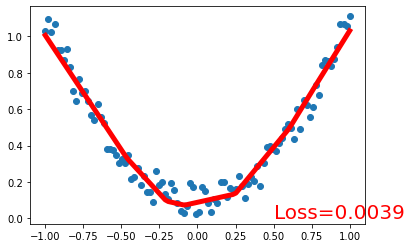

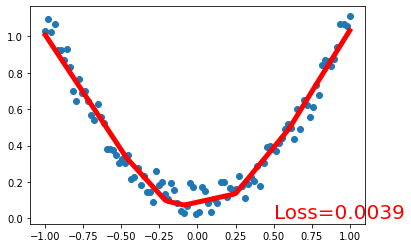

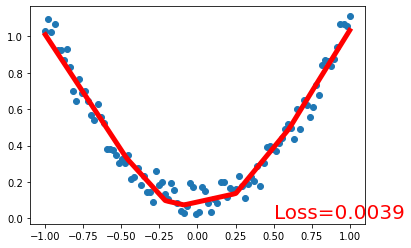

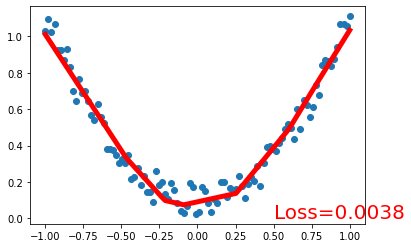

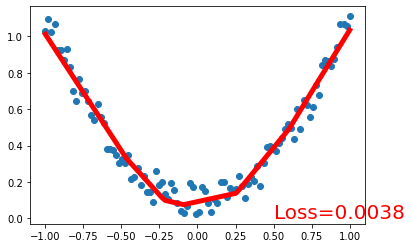

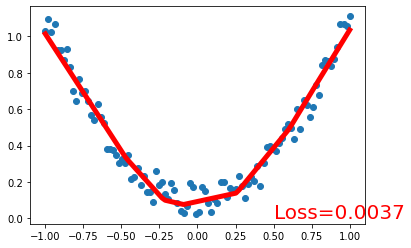

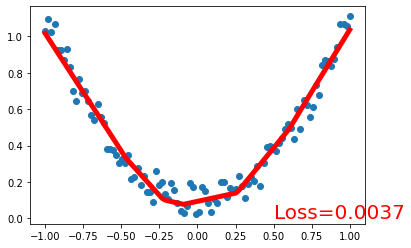

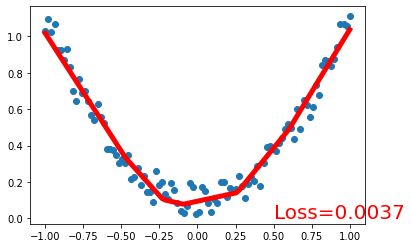

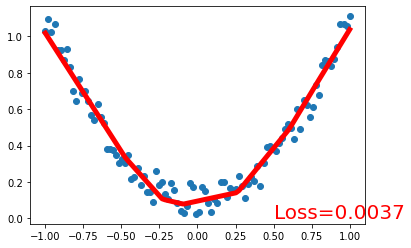

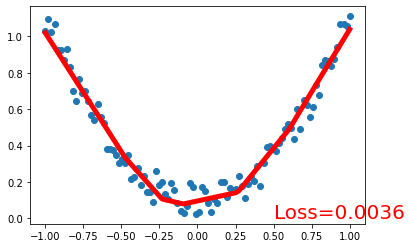

In [ ]:
net=Net(feature=1,n_hiddens=10,output=1)

optimizer=torch.optim.SGD(net.parameters(),lr=0.2)

loss_func=torch.nn.MSELoss()

plt.ion()
plt.show()
for t in range(200):
  prediction=net(x)
  loss=loss_func(prediction,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if t % 5 == 0:
    plt.cla()
    #print(prediction)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
    plt.pause(0.1)